In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema


591.5053650365461
minimum distance to see mirage =  295.75155546302847 m
1.9999999999935718
1.999291629768577
1.998784885228898


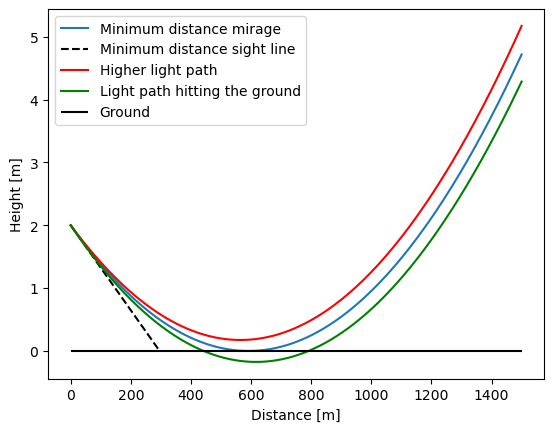

In [2]:
#defining limits and creating linspace
xmax = 1500
xtest = np.linspace(0,xmax,10000)
dx = 0.01

#defining constants 
h0 = 2
a = 1.146e-5
b = 1.002406

#defining constants for different initial values
c1 = b
d1 = (b/a)*np.arccosh(h0*a/b+1)

c2 = b+0.000002
d2 = 565

c3 = b-0.000002
d3 = 616.6



#defining the function for the light path and its derivative
def func(x,a,b,c,d):
    return (-b+c*np.cosh(a*(x-d)/c))/a

def linearisation(x,a,b,c,d):
    return np.sinh((x-d)*a/c)


#finding the point xmax0, where the linearisation hits the ground and making a new linspace based on that
xmax0 = -func(0,a,b,c1,d1)/linearisation(0,a,b,c1,d1)
xtest2 = np.linspace(0,xmax0,1000)

#Print minimum distance to see mirage
print("minimum distance to see mirage = ",xmax0,"m")


#plotting the 3 paths of light, the linearisation and the ground
plt.plot(xtest,func(xtest,a,b,c1,d1), label = 'Minimum distance mirage')

plt.plot(xtest2,linearisation(0,a,b,c1,d1)*xtest2 + func(0,a,b,c1,d1), 'k--', label = 'Minimum distance sight line')

plt.plot(xtest,func(xtest,a,b,c2,d2),'r', label = 'Higher light path')
plt.plot(xtest,func(xtest,a,b,c3,d3),'g', label = 'Light path hitting the ground')

plt.hlines(0,0,xmax,'k', label='Ground')

#axis labels, legend and saving the figure
plt.ylabel('Height [m]')
plt.xlabel('Distance [m]')
plt.legend()
plt.savefig('miragefig', dpi = 1000)

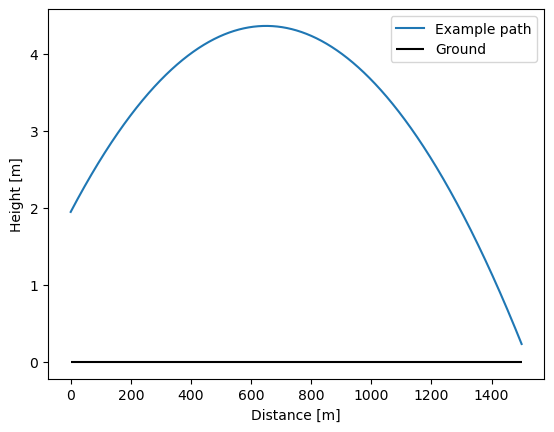

In [5]:
#defining constants for initial values
c4 = b-0.00005
d4 = 650

#plotting
plt.plot(xtest,func(xtest,-a,b,c4,d4), label = 'Example path')
plt.hlines(0,0,xmax,'k', label='Ground')
plt.ylabel('Height [m]')
plt.xlabel('Distance [m]')
plt.legend()
plt.savefig('miragefigcold', dpi = 1000)

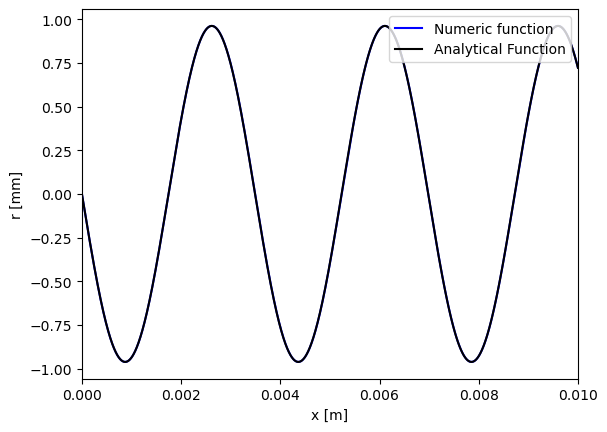

In [17]:
#nsin(i)=a
#sin(i)=dx/ds

#defining simulation parameters
cycles = 10000000
ds = 0.000001

#defining constants and variables based on initial values
a = 50000
alpha = 900
n0 = 100000
x0 = 0
r0 = 0

c = np.pi*a/(n0*alpha)

#making arrays for the simulation
x = np.zeros(cycles)
x[0] = x0

r = np.zeros(cycles)
r[0] = r0

dx = np.zeros(cycles)

dr = np.zeros(cycles)

#defining the refractive index function
def n_r(r,n0,alpha):
    return n0*np.sqrt(1-(alpha**2)*(r**2))

#the variable p is for flipping the direction when a maximum or minimum is reached (dx>=ds)
p=-1
#simulation loop for the predefined amount of cycles
for i in np.arange(0,cycles-1,1):
    dx[i+1] = ds*a/(n_r(r[i],n0,alpha)) #calculating dx based on the refractive index, the constant a and ds
    
    if dx[i+1] >= ds:
        dx[i+1] = dx[i]
        p *= -1         #the logic for flipping the sign of p when a maximum is reached
        
    dr[i+1] = p*np.sqrt(ds**2-dx[i+1]**2) #calculating dr using the pythagorean theorem
    
    x[i+1] = x[i] + dx[i+1] #advancing x
    r[i+1] = r[i] + dr[i+1] #advancing r

#making linspace based on the maximum value of x defined by the simulation
xtest = np.linspace(0,max(x),cycles)

#defining the analytical function
def rfunc(x,a,alpha,n0,c):
    return (np.sqrt(1-(a/n0)**2)*np.sin((x-c)*n0*alpha/a))/alpha

#plotting and saving
plt.plot(x,1000*r,'b', label = "Numeric function")
plt.plot(x,1000*rfunc(x,a,alpha,n0,c),'k', label = "Analytical Function")
plt.ylabel('r [mm]')
plt.xlabel('x [m]')
plt.xlim(0.0,0.01)
plt.rcParams['legend.loc'] = 1
plt.legend()
plt.savefig('fiberfig1', dpi = 1000)


1800.0


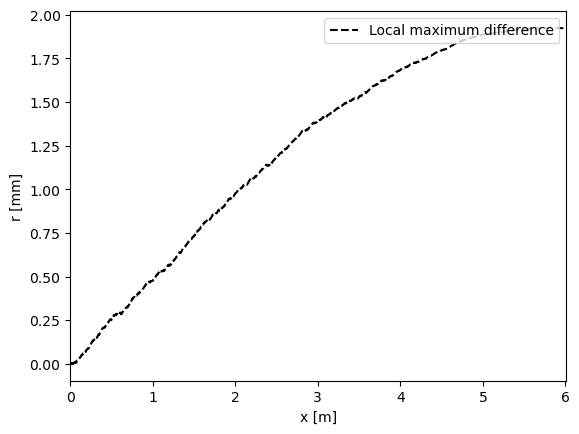

In [19]:
#finding the local maxima of the difference between the numerical and analytical function
peaks = argrelextrema(rfunc(x,a,alpha,n0,c)-r, np.greater)

#plotting
plt.plot(x[peaks],(1000*rfunc(x,a,alpha,n0,c)-1000*r)[peaks], 'k--', label = 'Local maximum difference')
plt.ylabel('r [mm]')
plt.xlabel('x [m]')
plt.xlim(0.0,6.01)
plt.rcParams['legend.loc'] = 1
plt.legend()
plt.savefig('fiberdif1', dpi = 1000)
print(n0*alpha/a)

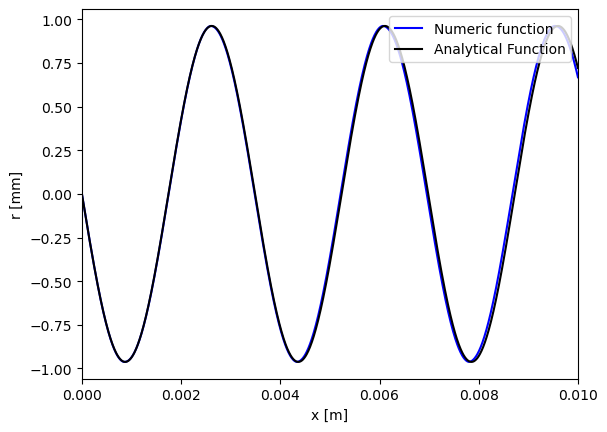

In [21]:
#
#From here it is repeats of before with a changed value of ds
#
#

cycles = 1000000
ds = 0.00001

a = 50000
alpha = 900
n0 = 100000
x0 = 0
r0 = 0

c = np.pi*a/(n0*alpha)


x = np.zeros(cycles)
x[0] = x0

r = np.zeros(cycles)
r[0] = r0

dx = np.zeros(cycles)

dr = np.zeros(cycles)


def n_r(r,n0,alpha):
    return n0*np.sqrt(1-(alpha**2)*(r**2))


p=-1
for i in np.arange(0,cycles-1,1):
    dx[i+1] = ds*a/(n_r(r[i],n0,alpha))
    
    if dx[i+1] >= ds:
        dx[i+1] = dx[i]
        p *= -1
        
    dr[i+1] = p*np.sqrt(ds**2-dx[i+1]**2)
    
    x[i+1] = x[i] + dx[i+1]
    r[i+1] = r[i] + dr[i+1]

#print(dx)
#print(r)
xtest = np.linspace(0,max(x),cycles)

def rfunc(x,a,alpha,n0,c):
    return (np.sqrt(1-(a/n0)**2)*np.sin((x-c)*n0*alpha/a))/alpha

plt.plot(x,1000*r,'b', label = "Numeric function")
plt.plot(x,1000*rfunc(x,a,alpha,n0,c),'k', label = "Analytical Function")
plt.ylabel('r [mm]')
plt.xlabel('x [m]')
plt.xlim(0.0,0.01)
plt.rcParams['legend.loc'] = 1
plt.legend()
plt.savefig('fiberfig2', dpi = 1000)


1800.0


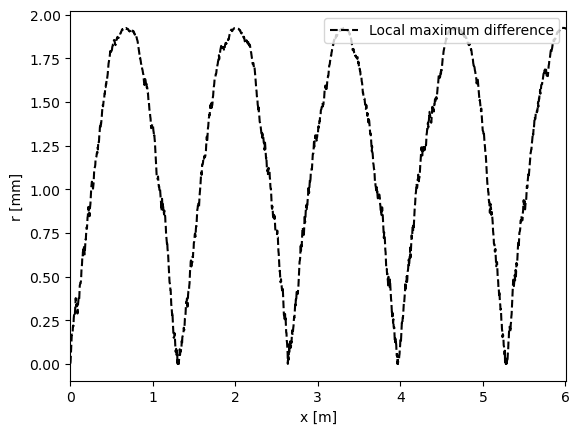

In [23]:
peaks = argrelextrema(rfunc(x,a,alpha,n0,c)-r, np.greater)


def sinfit(x,a,b):
    return a*np.sin(b*x)

#varsin, covsin = curve_fit(sinfit,x,r, p0=[-0.001,1600])

#plt.plot(x,1000*r,'r', label = "Numeric function")
#plt.plot(x,1000*rfunc(x,a,alpha,n0,c),'b--', label = "Analytical Function")
plt.plot(x[peaks],(1000*rfunc(x,a,alpha,n0,c)-1000*r)[peaks], 'k--', label = 'Local maximum difference')
plt.ylabel('r [mm]')
plt.xlabel('x [m]')
plt.xlim(0.0,6.01)
plt.rcParams['legend.loc'] = 1
plt.legend()
plt.savefig('fiberdif2', dpi = 1000)
print(n0*alpha/a)